# Prosper Data Exploration
## by Andrew Angeles

## Preliminary Wrangling

> The original dataset contains nearly 114,000 records pertaining to loans on the Prosper Platform. Each record represents a loan on the Prosper marketplace, and contains various information regarding the loan and the loan applicant. For example, for each loan the dataset contains information regarding the amount, interest rate, term, and status (Current, Defaulted, Cancelled, etc.).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sb

%matplotlib inline

# Initial Data Load and Review

In [2]:
# load csv to dataframe
df = pd.read_csv('../prosperLoanData.csv')

In [4]:
# Size and breadth of dataset
print(df.shape)

(113937, 81)


In [5]:
# Print Columns availiable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# Print summary stats for numberic variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [12]:
# Randomly select 15 records for review to better understand the data
df.sample(15)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
33713,C6273427055007567875CE6,366285,2008-07-12 22:17:08.720000000,A,36,Completed,2010-01-06 00:00:00,0.08860,0.0714,0.0614,...,-7.58,0.00,0.0,0.00,0.00,1.0,0,0,0.0,46
70630,E58C33801119825507C98AF,97034,2007-02-10 11:56:03.420000000,AA,36,Completed,2008-09-19 00:00:00,0.07680,0.0700,0.0650,...,-11.80,0.00,0.0,0.00,0.00,1.0,0,0,0.0,41
55074,E7EC3557276566534D5482C,630702,2012-08-29 10:21:43.877000000,NaN,36,Current,NaN,0.21025,0.1734,0.1634,...,-51.99,0.00,0.0,0.00,0.00,1.0,1,0,0.0,79
47392,92F03418434987233782447,307348,2008-04-10 13:55:46.873000000,A,36,Completed,2011-04-17 00:00:00,0.12201,0.1080,0.0980,...,-46.87,0.00,0.0,0.00,0.00,1.0,0,0,0.0,63
86011,5ACD359705863788136256F,1041574,2013-12-09 15:43:03.673000000,NaN,36,Current,NaN,0.12081,0.0930,0.0830,...,-25.17,0.00,0.0,0.00,0.00,1.0,0,0,0.0,1
57232,71293410513040165DFA06B,267401,2008-01-17 21:23:46.563000000,HR,36,Completed,2011-04-29 00:00:00,0.31974,0.3000,0.2900,...,-56.43,-292.11,0.0,0.00,0.00,1.0,0,0,0.0,5
27488,D8E83591802029819684A84,954268,2013-10-22 01:07:03.153000000,NaN,60,Current,NaN,0.22908,0.2045,0.1945,...,-23.25,0.00,0.0,0.00,0.00,1.0,0,0,0.0,1
68712,065934786026897487B3F30,450130,2010-03-11 16:51:18.277000000,NaN,36,Completed,2012-05-15 00:00:00,0.36716,0.3400,0.3300,...,-23.87,0.00,0.0,0.00,0.00,1.0,0,0,0.0,49
29584,15DD3602361940458DD66C1,1153873,2014-02-11 09:25:12.507000000,NaN,36,Current,NaN,0.11599,0.0879,0.0779,...,0.00,0.00,0.0,0.00,0.00,1.0,0,0,0.0,259
4576,069E34005491261586790F8,203688,2007-09-19 07:06:22.937000000,E,36,Chargedoff,2008-10-24 00:00:00,0.30465,0.2900,0.2800,...,-24.90,-2.63,3381.1,3381.09,377.36,1.0,0,0,0.0,39


### What is the structure of your dataset?

> The original data source contains 113,937 rows and 81 columns varying from simple record identification (loan number), details of original loan (term, loan amount, reason, etc.), to the final outcome of the loan. 

### What is/are the main feature(s) of interest in your dataset?

> When I saw this project, I got a bit excited given my experience as an investor on this platform and to this day I continue to invest in a variety of loans. I have been an investor in the platform since 2012, funding 2-3 notes a month and have achieved annualized net returns of 5.63% (as of 12-2020) targeting notes in the AA to C range. Given my background, I'll be focusing my analysis on features and their relation to loan outcome.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Over the years, I have developed a number of different loan screens based on loan size, loan category, term, debt-to-income ratio, etc, and I'll be using this opportunity to conduct analysis on those variables and loan outcome. Given my scope of analysis I will only be focusing on loans that have 'closed' (ie they have been paid in full, or a loss event).

## Data Preparation

### Focus on closed Loans
> Since I'll be focusing on variables as they relate to the final loan outcome, I'll first narrow down the data set to loans that have a 'ClosedDate'.

In [3]:
# drop records that are missing 'ClosedDate'
dfClean =  df.dropna(subset=["ClosedDate"])
print(dfClean.shape[0])

55089


### Focus on Loans with Prosper Score
> The strongest indicator of loan outcome is the Prosper Score (post 2009), my goal is to then see if any marginal gains in returns (lower rate of loan failure) through the use of other variables after controlling for Prosper Score. For example, for all loans of Prosper Score 9, do large loans or smaller loans have a higher rate of success? To answer such questions, I'll need to limit my analysis to only loans with a Prosper Score.

In [5]:
# drop records that are missing 'ProsperScore'
dfClean = dfClean.dropna(subset=["ProsperScore"])
print(dfClean.shape[0])

26005


### Get Listing Category Values

In [6]:
# Decode ListingCategory (numeric) feature
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Create new column with the named listing category
dfClean['ListingCategory'] = dfClean['ListingCategory (numeric)'].map(list_dict)

### Data preparation results
> Due to the scope of my analysis, I've removed all loans that are still in progress (i.e. have no ClosedDate) and removed records where the ProsperScore is null. The final data set now stands at 26,005 loans and we now have the text for each loan category.

### Focus on variables of interest
> As previously mentioned, my end goal is to see if other variables outside of Prosper Score provide any benefits to loan selection on the Prosper Platform. Namely, I'll be focusing on variables that I routinely use when investing on loans.

In [7]:
# Create array with variables of interest
keyVariables = ['LoanNumber','ProsperScore','Term','IsBorrowerHomeowner','IncomeVerifiable','ListingCategory','DebtToIncomeRatio', 'BankcardUtilization','OpenCreditLines','DelinquenciesLast7Years','CurrentDelinquencies','LoanStatus','LoanOriginalAmount','LP_CustomerPayments','LP_NonPrincipalRecoverypayments','LP_NetPrincipalLoss', 'LP_GrossPrincipalLoss','EstimatedReturn','LenderYield']

# Create dataframe with only columns of interest
dfClean = dfClean[keyVariables]

# Confirm column changes took place
dfClean.shape

(26005, 19)

In [57]:
# Sample 5 data records
dfClean.sample(5)

,LoanNumber,ProsperScore,Term,IsBorrowerHomeowner,IncomeVerifiable,ListingCategory,DebtToIncomeRatio,BankcardUtilization,OpenCreditLines,DelinquenciesLast7Years,CurrentDelinquencies,LoanStatus,LoanOriginalAmount,LP_CustomerPayments,LP_NonPrincipalRecoverypayments
1576,78287,8.0,36,False,True,Debt Consolidation,0.18,0.77,16.0,0.0,0.0,Completed,10000,11653.23,0.0
63582,89143,6.0,36,False,True,Debt Consolidation,0.28,0.31,10.0,0.0,1.0,Completed,2000,2024.53,0.0
60634,66654,5.0,36,False,True,Large Purchases,0.26,0.82,2.0,12.0,0.0,Chargedoff,4000,2069.52,0.0
89641,60188,5.0,36,False,True,Debt Consolidation,0.20,0.00,1.0,14.0,0.0,Chargedoff,4000,2923.07,0.0
100772,59203,4.0,36,True,False,Business,NaN,0.51,15.0,0.0,0.0,Completed,4000,4596.20,0.0


## Univariate Exploration

<strong>Bank Card Utilization (%) and Debt to Income Ratio</strong>

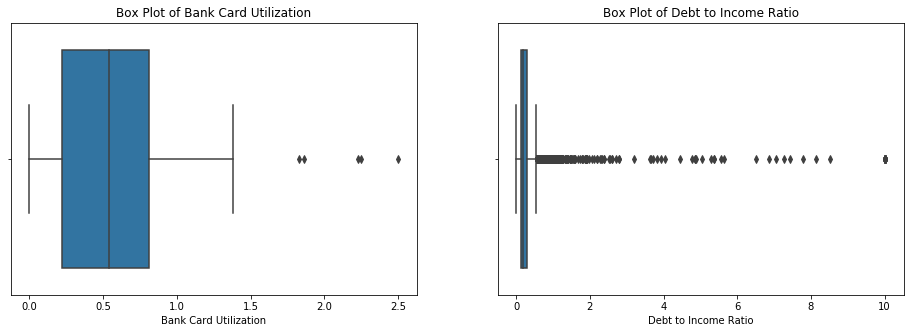

In [71]:
# fig obj
plt.figure(figsize = [16, 5])

# Generate first box plot
plt.subplot(1,2,1)
sb.boxplot(data = dfClean, x = 'BankcardUtilization');
plt.title('Box Plot of Bank Card Utilization')
plt.xlabel('Bank Card Utilization');

# Generate second box plot
plt.subplot(1,2,2)
sb.boxplot(data = dfClean, x = 'DebtToIncomeRatio');
plt.title('Box Plot of Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio');

> <strong>Bank Card Utilization</strong> The distribution of bank card utilization is fairly uniform, with some clustering at 0% and 100%. Additionally, there are a few outliers in the data past 150% and this will serve as a cut off point for future analysis.

> <strong>Debt to Income Ratio</strong> From the box plots, it is difficult to get a hold of the distribution, however, it's clear that there are a number of outliers. The next step for this variable is to further visualize to get more information.

<strong>Debt to Income Histogram</strong>
> Because the box plot left much to be desired, an additional visual will be created to better understand the behavior of this variable.

In [12]:
# Get summary stats for Debt to income ratio
dfClean['DebtToIncomeRatio'].describe()

count    23033.000000
mean         0.248757
std          0.383909
min          0.000000
25%          0.130000
50%          0.200000
75%          0.300000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

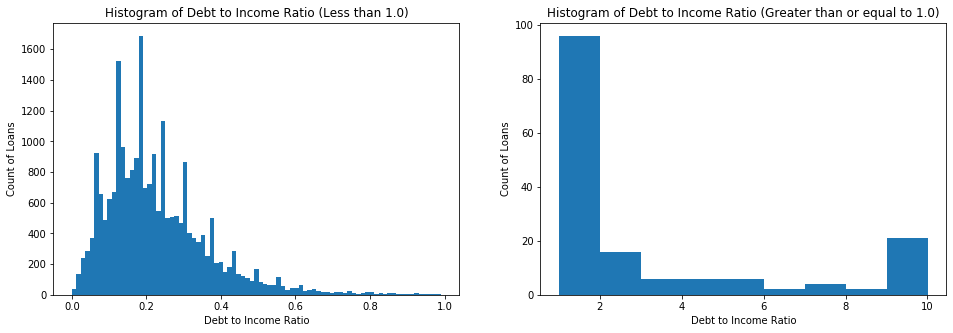

In [70]:
# Create fig obj
plt.figure(figsize = [16, 5])
# Plot debt to income histogram for ratios < 1.0
plt.subplot(1,2,1)
plt.hist(dfClean.query('DebtToIncomeRatio < 1')['DebtToIncomeRatio'], bins = 'auto');
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count of Loans')
plt.title('Histogram of Debt to Income Ratio (Less than 1.0)');

# Plot debt to income histogram for ratios >= 1.0
plt.subplot(1,2,2)
plt.hist(dfClean.query('DebtToIncomeRatio >= 1')['DebtToIncomeRatio'], bins = 'auto');
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count of Loans')
plt.title('Histogram of Debt to Income Ratio (Greater than or equal to 1.0)');


> <strong>Debt to Income Ratio</strong> From the histograms, it appears that the debt to income variable follows somewhat of a lognormal distribution with most observations clustered around 20%. Additionally, the long tail on the right end provides some insights into a proper cutoff for analysis.

### Loan Amount

In [16]:
# Get summary stats for loan amount log transformed to select bin and tick ranges
np.log10(dfClean['LoanOriginalAmount'].describe())

count    4.415057
mean     3.804531
std      3.679544
min      3.000000
25%      3.477121
50%      3.653213
75%      3.903090
max      4.544068
Name: LoanOriginalAmount, dtype: float64

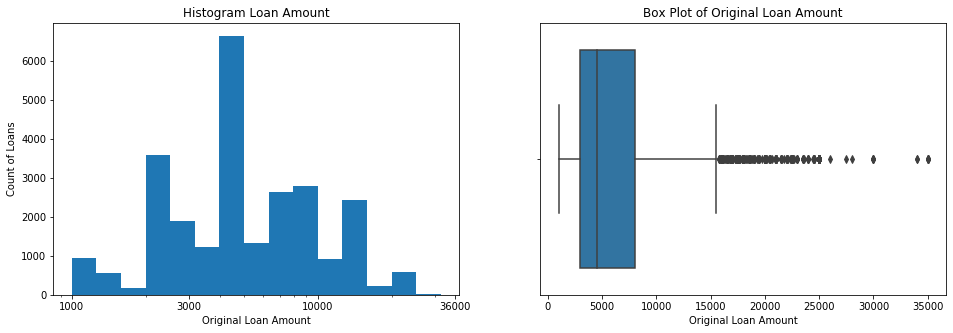

In [68]:
# Create fig obj
plt.figure(figsize = [16, 5])
plt.subplot(1,2,1)
# Create bins to support plotting
bins = 10 ** np.arange(3,4.5+0.1,0.1)
# Ticks for labels
ticks = [1000,3000,10000,36000]
# Create array for tick labels
labels = ['{}'.format(v) for v in ticks]
# Plot histogram
plt.hist(data=dfClean, x = 'LoanOriginalAmount', bins = bins);
# log scale
plt.xscale('log')
# Plot ticks and labels
plt.xticks(ticks, labels);
plt.title('Histogram Loan Amount')
plt.xlabel('Original Loan Amount');
plt.ylabel('Count of Loans');

# plot boxplot for loan amount
plt.subplot(1,2,2)
sb.boxplot(data = dfClean, x = 'LoanOriginalAmount');
plt.title('Box Plot of Original Loan Amount')
plt.xlabel('Original Loan Amount');

> <strong>Loan Amount</strong> From the histogram, there is no clear distribution pattern in the loan amount, however, the box plot shows that roughly 75% of loans originate for less than $15,000.

### Open Credit Lines

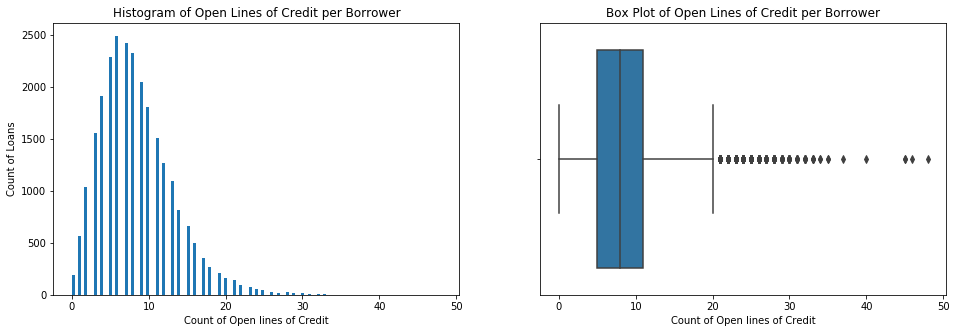

In [65]:
# create fig object
plt.figure(figsize = [16, 5])

plt.subplot(1,2,1)
# plot histogram of open lines of credit
plt.hist(dfClean['OpenCreditLines'], bins = 'auto');
plt.title('Histogram of Open Lines of Credit per Borrower')
plt.ylabel('Count of Loans')
plt.xlabel('Count of Open lines of Credit');

plt.subplot(1,2,2)
# plot boxplot of open lines of credit
sb.boxplot(data = dfClean, x = 'OpenCreditLines');
plt.title('Box Plot of Open Lines of Credit per Borrower')
plt.xlabel('Count of Open lines of Credit');

> <strong>Open Lines of Credit</strong>  These variables appear to have a similar distribution to debt to income ratio. The number of observations above 20 drops off dramatically, indicating this may be a good cutoff point for analysis.


### Loan Listing Categories

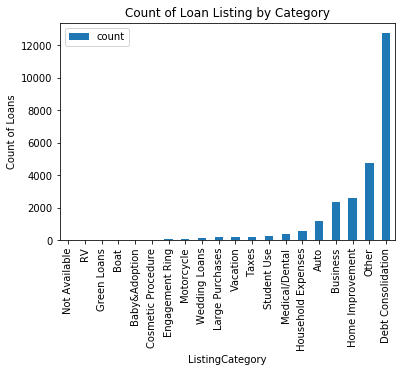

In [58]:
# Create count plot of number of loans by listing category
dfClean.groupby('ListingCategory')['ListingCategory'].agg(['count']).sort_values('count').plot(kind='bar', title = 'Count of Loan Listing by Category');
plt.ylabel('Count of Loans');

> The vast majority of loan listings are from: Auto, Business, Home Improvement, Other, and Debt Consolidation. For that reason, I'll focus on those loan types in future analysis.

### Loan Outcome
> We will be using the loan status, however, since all loans in our analysis have a closed date we can reference the status as the loan outcome.

Propser Platform Total Returns (Total funds recieved/Total funds loaned): -2.36%


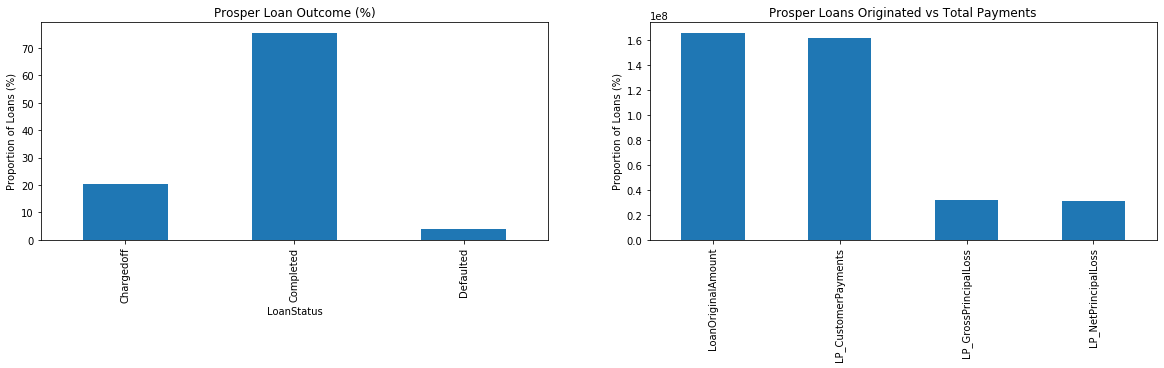

In [56]:
# Create fig obj
plt.figure(figsize=[20,4])
# create and set base_color variable
base_color = sb.color_palette()[0]

plt.subplot(1,2,1)
# Create new dataframe to count the number of loans within each status
dfBaseline = dfClean.groupby('LoanStatus')['LoanNumber'].count()
dfBaseline = dfBaseline.divide(dfBaseline.sum())*100
dfBaseline.plot(kind='bar', title = 'Prosper Loan Outcome (%)');
plt.ylabel('Proportion of Loans (%)')

plt.subplot(1,2,2)
# Create dataframe to calculate the total dollar volumes loaned, and recieved
dfClean[['LoanOriginalAmount','LP_CustomerPayments','LP_GrossPrincipalLoss','LP_NetPrincipalLoss']].sum().plot(kind='bar',title='Prosper Loans Originated vs Total Payments');
plt.ylabel('Proportion of Loans (%)')

# Based on dollar volumes determine overall platform returns
totalDollarsInvested = dfClean['LoanOriginalAmount'].sum()
totalDollarsRecieved = dfClean['LP_CustomerPayments'].sum() + dfClean['LP_NonPrincipalRecoverypayments'].sum()
platformReturn = round(((totalDollarsRecieved/totalDollarsInvested)-1)*100,2)

print('Propser Platform Total Returns (Total funds recieved/Total funds loaned): {0}%'.format(str(platformReturn)))

> <strong>Prosper Loan Outcome (%):</strong> As an investor on the platform this is my chief concern. My ultimate goal is to fund loans that result in successful payment based on the terms established at loan origination. As much as possible, I aim to avoid loans that end up charged off or defaulted as both result in a permanent loss of capital. Consequently, all future analysis will be done in relation to this goal. 
<br/>
> <strong>Prosper Loans Originated vs Total Payments: </strong> Based on this chart, it appears that in aggregate for all closed loans since 2009, there has been a negative return on principal invested on the platform (-2.36%), this is surprising given my personal rate of return of 5.63%.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> <ul>
    <li><strong>Debt to Income Ratio:</strong>The variable has some extreme outliers. To control for this two histograms were created to better assess the variables distribution</li>
    <li><strong>Loan Amount:</strong> In the histogram analysis of loan amount, the variable was log transformed.</li>
</ul>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> <strong>Listing Category: </strong>The variable was decoded to make the tagging meaningful. After the decoding, a simple bar chart was created to see the makeup of loan categories at listing.

## Supplemental Data Processing
> Based on the previous univariate analysis as well as my scope of interest, the below data processing aims to create bands of interest for different variables of interest to support creation of additional visuals. 


In [21]:
# print summary stats for variables of interest to help create quartile ranges for different variables 
dfClean[['BankcardUtilization','DebtToIncomeRatio','LoanOriginalAmount','OpenCreditLines','ProsperScore']].describe()

,BankcardUtilization,DebtToIncomeRatio,LoanOriginalAmount,OpenCreditLines,ProsperScore
count,26005.000000,23033.000000,26005.000000,26005.000000,26005.000000
mean,0.514433,0.248757,6375.752009,8.452028,6.265987
std,0.328647,0.383909,4781.275619,4.767657,2.319612
min,0.000000,0.000000,1000.000000,0.000000,1.000000
25%,0.220000,0.130000,3000.000000,5.000000,5.000000
50%,0.540000,0.200000,4500.000000,8.000000,6.000000
75%,0.810000,0.300000,8000.000000,11.000000,8.000000
max,2.500000,10.010000,35000.000000,48.000000,11.000000


### Bank Card Utilization

In [8]:
# from the summary stats, create array of values to define quartile ranges for bank card utilization
bankCardUtilization_bins = [0,0.22,0.54,0.81,2.5]
# define bin labels
bankCardUtilization_bins_labels = ['Quartile 1','Quartile 2','Quartile 3','Quartile 4']

# add new column to data frame with bin label for each record
dfClean['BankCardUtilizationBin'] = pd.cut(dfClean['BankcardUtilization'], bins = bankCardUtilization_bins, labels = bankCardUtilization_bins_labels)
# confirm change by sampling random records
dfClean[['BankcardUtilization','BankCardUtilizationBin']].sample(5)

,BankcardUtilization,BankCardUtilizationBin
23490,0.69,Quartile 3
10393,0.95,Quartile 4
17245,0.00,NaN
94122,0.79,Quartile 3
31846,0.48,Quartile 2


### Debt to Income

In [9]:
# from the summary stats, create array of values to define quartile ranges for debt to income
debtToIncome_bins = [0,0.13,0.20,0.30,10.01]
# define bin labels
debtToIncome_bins_labels = ['Quartile 1','Quartile 2','Quartile 3','Quartile 4']
# add new column to data frame with bin label for each record
dfClean['DebtToIncomeRatioBin'] = pd.cut(dfClean['DebtToIncomeRatio'], bins = debtToIncome_bins, labels = debtToIncome_bins_labels)
# confirm change by sampling random records
dfClean[['DebtToIncomeRatio','DebtToIncomeRatioBin']].sample(5)

,DebtToIncomeRatio,DebtToIncomeRatioBin
20275,0.22,Quartile 3
59039,0.19,Quartile 2
79536,0.29,Quartile 3
23197,0.07,Quartile 1
42625,0.14,Quartile 2


### Loan Original Amount

In [10]:
# from the summary stats, create array of values to define quartile ranges for loan amount
loanAmount_bins = [1000,3000,4500,8000,35000]
# define bin labels
loanAmount_bins_labels = ['Quartile 1','Quartile 2','Quartile 3','Quartile 4']
# add new column to data frame with bin label for each record
dfClean['LoanOriginalAmountBin'] = pd.cut(dfClean['LoanOriginalAmount'],bins =loanAmount_bins ,labels = loanAmount_bins_labels)
# confirm change by sampling random records
dfClean[['LoanOriginalAmount','LoanOriginalAmountBin']].sample(5)

,LoanOriginalAmount,LoanOriginalAmountBin
60210,2000,Quartile 1
111265,12765,Quartile 4
88051,10000,Quartile 4
70738,15000,Quartile 4
2344,2000,Quartile 1


### Open Credit Lines

In [11]:
# from the summary stats, create array of values to define quartile ranges for credit lines
openCreditLines_bins = [0,5,8,11,48]
# define bin labels
openCreditLines_labels =  ['Quartile 1','Quartile 2','Quartile 3','Quartile 4']
# add new column to data frame with bin label for each record
dfClean['CreditLinesBin'] = pd.cut(dfClean['OpenCreditLines'],bins =openCreditLines_bins ,labels = openCreditLines_labels)
# confirm change by sampling random records
dfClean[['OpenCreditLines','CreditLinesBin']].sample(5)

,OpenCreditLines,CreditLinesBin
9132,7.0,Quartile 2
7516,6.0,Quartile 2
69992,12.0,Quartile 4
107502,13.0,Quartile 4
67001,5.0,Quartile 1


### Prosper Score


In [12]:
# Creating bands on Prosper Score
ProsperScore_bins = [1,6,11]
# define bin labels
ProsperScore_labels =  ['Bottom Half','Top Half']
# add new column to data frame with bin label for each record
dfClean['ProsperScoreBin'] = pd.cut(dfClean['ProsperScore'],bins =ProsperScore_bins ,labels = ProsperScore_labels)
# confirm change by sampling random records
dfClean[['ProsperScore','ProsperScoreBin']].sample(5)

,ProsperScore,ProsperScoreBin
23158,5.0,Bottom Half
44056,8.0,Top Half
56081,4.0,Bottom Half
80313,6.0,Bottom Half
53240,5.0,Bottom Half


## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables. Given the context of my analysis (i.e. generate higher returns on the platform with reduced risk), all analysis will be of the form: variable X vs Loan Status. 
### Loan Status by Prosper Score
> As expected better loan outcomes are associated with higher Prosper Loan scores, while the opposite is true for lower scoring loans.

8.0     4516
6.0     3945
5.0     3284
9.0     3216
7.0     3154
4.0     2731
10.0    1653
3.0     1566
2.0     1295
1.0      613
11.0      32
Name: ProsperScore, dtype: int64


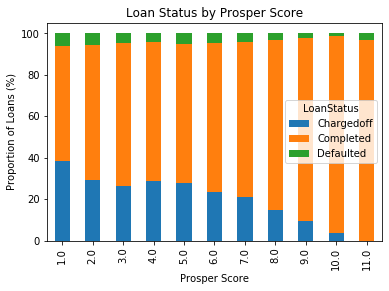

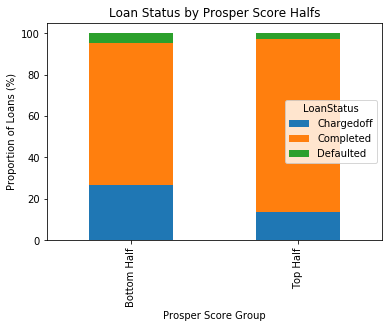

In [32]:
# Create new dataframe to get count of loans in each status by prosper score
dfProsperScore = dfClean.groupby(['ProsperScore','LoanStatus'])['LoanNumber'].count().unstack()
dfProsperScore = dfProsperScore.T.div(dfProsperScore.T.sum()).T*100
# plot stacked bar chart
dfProsperScore.plot(kind='bar', stacked = True, title = 'Loan Status by Prosper Score');

# Create new dataframe to get count of loans in each status by prosper score group (Low/High)
dfProsperScoreHalf = dfClean.groupby(['ProsperScoreBin','LoanStatus'])['LoanNumber'].count().unstack()
dfProsperScoreHalf = dfProsperScoreHalf.T.div(dfProsperScoreHalf.T.sum()).T*100
plt.xlabel('Prosper Score')
plt.ylabel('Proportion of Loans (%)')
# plot stacked bar chart
dfProsperScoreHalf.plot(kind='bar', stacked = True, title = 'Loan Status by Prosper Score Halfs');
plt.xlabel('Prosper Score Group')
plt.ylabel('Proportion of Loans (%)')
print(dfClean['ProsperScore'].value_counts())

### Borrower APR by Prosper Score

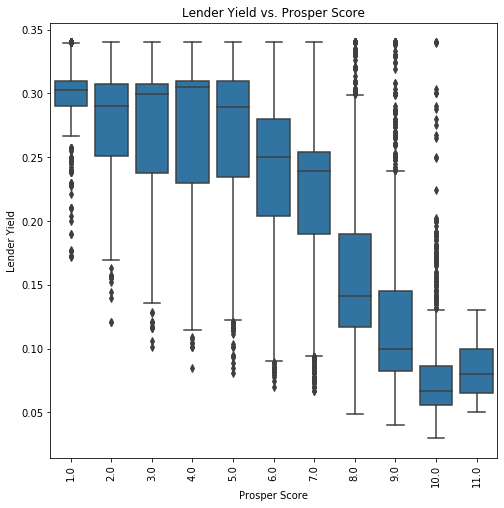

In [14]:
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax = sb.boxplot(data =  dfClean, x = 'ProsperScore', y = 'LenderYield', color = default_color)
plt.title('Lender Yield vs. Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield')
plt.xticks(rotation=90)
plt.show()


### Loan Status by Bank Card Utilization
> There appears to be a weak relationship between Bank Card Utilization and loan status, namely the higher the bank card utilization rate the higher proprotion of loans end in default or charge off.

Text(0, 0.5, 'Proportion of Loans (%)')

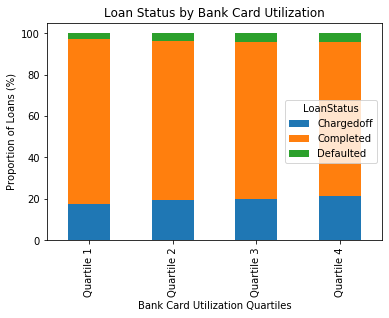

In [33]:
# create dataframe to get count of loans within each status by Bank Card Utilization Quartile bin
dfBankCardUtilization = dfClean.groupby(['BankCardUtilizationBin','LoanStatus'])['LoanNumber'].count().unstack()
# Scale by 100%
dfBankCardUtilization = dfBankCardUtilization.T.div(dfBankCardUtilization.T.sum()).T*100
# Create stacked bar chart to show relative proportion of each loan status by quartile range
dfBankCardUtilization.plot(kind='bar', stacked = True, title = 'Loan Status by Bank Card Utilization');
plt.xlabel('Bank Card Utilization Quartiles')
plt.ylabel('Proportion of Loans (%)')

### Loan Status by Deby to Income Ratio
> There appears to be a modes relationship between Debt to Income and loan status, namely the higher the Debt to Income Ratio rate the higher proprotion of loans end in default or charge off.

Text(0, 0.5, 'Proportion of Loans (%)')

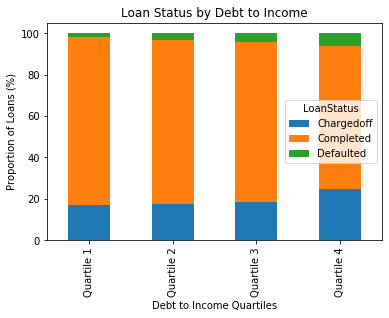

In [34]:
# create dataframe to get count of loans within each status by Debt to income Quartile bin
dfDebtToIncome = dfClean.groupby(['DebtToIncomeRatioBin','LoanStatus'])['LoanNumber'].count().unstack()
# Scale by 100%
dfDebtToIncome = dfDebtToIncome.T.div(dfDebtToIncome.T.sum()).T*100
# Create stacked bar chart to show relative proportion of each loan status by quartile range
dfDebtToIncome.plot(kind='bar', stacked = True, title = 'Loan Status by Debt to Income');
plt.xlabel('Debt to Income Quartiles')
plt.ylabel('Proportion of Loans (%)');

### Loan Status by Original Loan Amount

> There appears to be a flat relationship between original loan amount and loan status. For the lowest and highest quartile, the rate of default and chargeoff is roughly the same. No further analysis of this variable warranted.

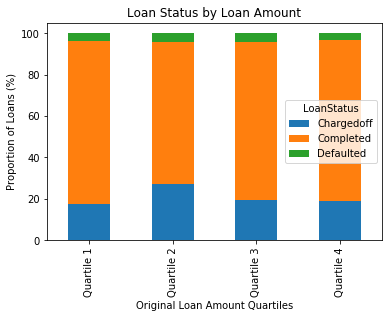

In [72]:
# create dataframe to get count of loans within each status by Loan Amount Quartile bin
dfLoanAmount = dfClean.groupby(['LoanOriginalAmountBin','LoanStatus'])['LoanNumber'].count().unstack()
# scale by 100%
dfLoanAmount = dfLoanAmount.T.div(dfLoanAmount.T.sum()).T*100
# Create stacked bar chart to show relative proportion of each loan status by quartile range
dfLoanAmount.plot(kind='bar', stacked = True, title = 'Loan Status by Loan Amount');
plt.xlabel('Original Loan Amount Quartiles')
plt.ylabel('Proportion of Loans (%)');

### Loan Status by Open Lines of Credit
> There appears to be a weak relationship between Open Lines of Credit and loan status, namely the higher the number of open lines of credit a borrower has the higher proprotion of loans end in default or charge off.

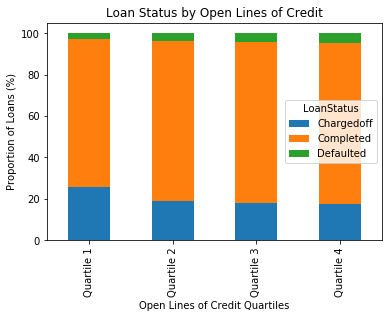

In [36]:
# create dataframe to get count of loans within each status by Open Lines of Credit Quartile bin
dfCreditLines = dfClean.groupby(['CreditLinesBin','LoanStatus'])['LoanNumber'].count().unstack()
# Scale count to 100%
dfCreditLines = dfCreditLines.T.div(dfCreditLines.T.sum()).T*100
# Create stacked bar chart to show relative proportion of each loan status by quartile range
dfCreditLines.plot(kind='bar', stacked = True, title = 'Loan Status by Open Lines of Credit');
plt.xlabel('Open Lines of Credit Quartiles')
plt.ylabel('Proportion of Loans (%)');

### Open Bank Card Utilization,  Debt to Income, & Lines of Credit   vs Prosper Score
> The previous charts suggest that there is some relationship between Bank Card Utilization, and Debt to Income ratio with terminal loan status. However, by partioning only by quartile range of a given variable, its not possible to rule out that perhaps all the loans in the lower quartiles are made up of loans with high prosper scores (and vice versa), and that the observed result maybe fully explained by Prosper Score. To investigate this, we need to know the overall distribution of bank utilization rates and debt to income for the low and high Prosper Score Groups. If they are materially different, then the observed relationship between bank card utilization and debt to income with loan status maybe spurious. 

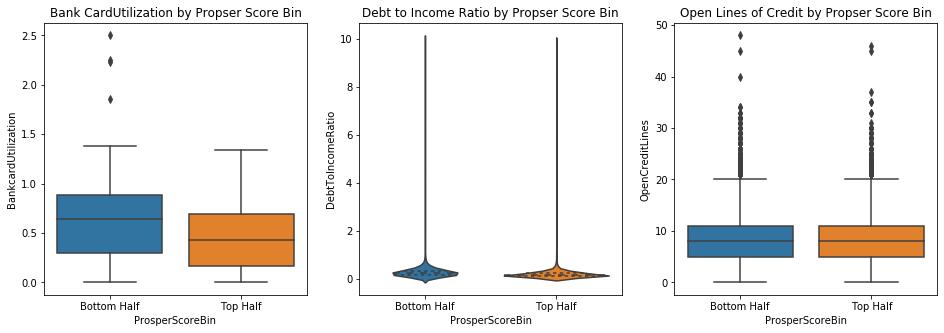

In [46]:
# Create fig obj
plt.figure(figsize = [16, 5])

plt.subplot(1, 3, 1)
# plot box plot of bank card utilization by Prosper Score bins
sb.boxplot(data = dfClean, x = 'ProsperScoreBin', y = 'BankcardUtilization')
plt.title('Bank CardUtilization by Propser Score Bin');

plt.subplot(1, 3, 2)
# plot violin plot of Debt to income by Prosper Score bins
sb.violinplot(data = dfClean, x = 'ProsperScoreBin', y= 'DebtToIncomeRatio', inner = 'quartile');
plt.title('Debt to Income Ratio by Propser Score Bin');

plt.subplot(1,3,3)
# plot box plot of Open lines of Credit by Prosper Score bins
sb.boxplot(data = dfClean, x = 'ProsperScoreBin', y='OpenCreditLines');
plt.title('Open Lines of Credit by Propser Score Bin');

### Print out Summary Stats to Get a Clearer Picture

In [19]:
# get summary stats
dfClean.groupby('ProsperScoreBin')[['BankcardUtilization','DebtToIncomeRatio']].describe()

BankcardUtilization                                       \
                              count      mean       std  min   25%   50%   
ProsperScoreBin                                                            
Bottom Half                 12821.0  0.576964  0.334067  0.0  0.30  0.64   
Top Half                    12571.0  0.445885  0.304763  0.0  0.17  0.43   

                            DebtToIncomeRatio                                 \
                  75%   max             count      mean       std  min   25%   
ProsperScoreBin                                                                
Bottom Half      0.88  2.50           10818.0  0.300023  0.487933  0.0  0.17   
Top Half         0.69  1.34           11786.0  0.195262  0.225442  0.0  0.11   

                                    
                  50%   75%    max  
ProsperScoreBin                     
Bottom Half      0.24  0.34  10.01  
Top Half         0.17  0.24  10.01

> Based on the box and violin plots, along with the summary stats, it it appears that the underlying characteristics of bank card utiilization and debt to income variables are not sufficiently different between the low and high Prosper score group. This implies that any observed difference in loan outcome broken across different variable quartiles is reflecting a true relationship and further analysis is waranted.

### Focusing only on Bank Card Utilization and Debt to Income
> As the relationship between open lines of credit and loan status appears weaker, we'll focus only on bank card utilization and debt to income ratio. 

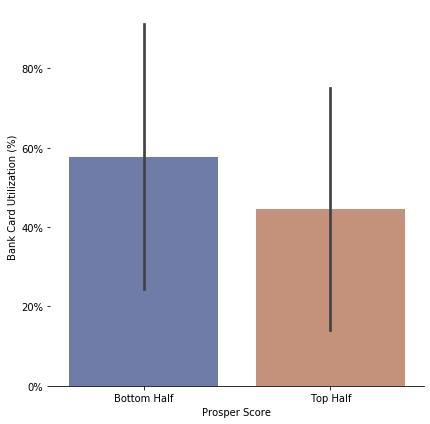

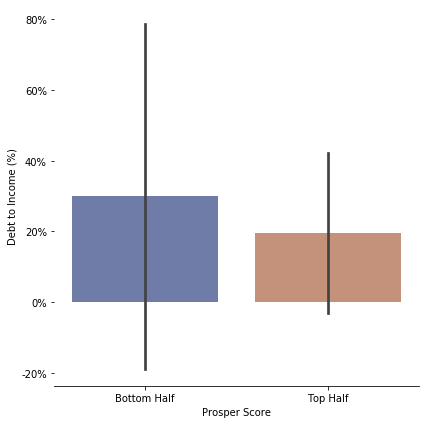

In [26]:


# Draw a nested barplot with standard devation lines for bank card utilization by Prosper Score Group
g = sb.catplot(
    data=dfClean, kind="bar",
    x="ProsperScoreBin", y="BankcardUtilization",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
# add labels
g.set_axis_labels("Prosper Score", "Bank Card Utilization (%)");
# format y-axis ticks
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

# Draw a nested barplot with standard devation lines for debt to income by Prosper Score Group
dti = sb.catplot(
    data=dfClean, kind="bar",
    x="ProsperScoreBin", y="DebtToIncomeRatio",
    ci="sd", palette="dark", alpha=.6, height=6
)
dti.despine(left=True)
# Add labels
dti.set_axis_labels("Prosper Score", "Debt to Income (%)");
# format y-axis ticks
for ax in dti.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))


> The previous last visuals support the notion that there is no significant difference betweeen the distribution of key variables of interest (bank card utilizatio and debt to income ratio) between the low and high Prosper score groups. Consequently, we can assume that after we control for the low/high Prosper Score and analyze by quartile bins, observed relationships against loan status will be more reliable.

### Overview of Open Lines of Credit, Debt to Income, and Bank Card Utilization
> Create a general PairGrid chart to plot multiple variables against one another at once in order to spot any other potential relationships of interest and get a feel for overal behavior of variables.

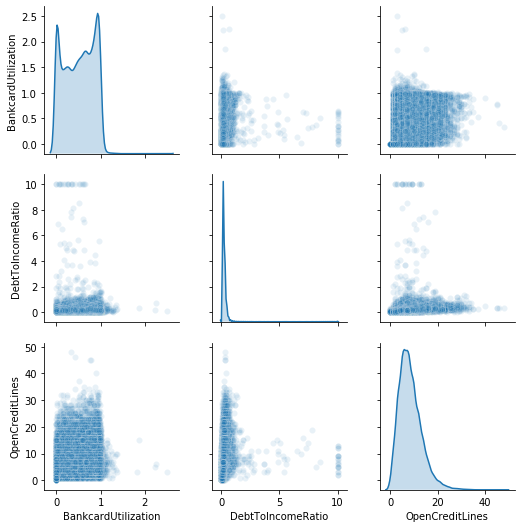

In [23]:
# pairplot() example
g = sb.pairplot(dfClean, vars = ['BankcardUtilization','DebtToIncomeRatio','OpenCreditLines'], kind='scatter', diag_kind='kde',plot_kws={'alpha':0.1})
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For the variables Bank Card Utilization, Debt to Income Ratio, and Open lines of credit seems to correlate with higher levels of default and charge off rates (ie higher quartiles are associated with higher rates of default and charge off compared to the lowest quartile). However, for the variable of loan amount, no such behavior is observed. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When comparing the overall distribution of Bank Card Utilization, Debt to Income, and Open Credit lines against the Top and Bottom Prosper Score bins, I was surprised to see overall similar distributions. I initially thought that the observed difference in loan status outcome between the different quartiles was likely due to the fact that higher/lower Bank Card Utilization, Debt to Income, and Open Credit lines were associated with lower to higher Prosper Scores. However, it is important that the overall distribution of Bank Card Utilization, Debt to Income, and Open Credit lines remains similar across the Bottom and Top Prosper Bins as this makes the next steps of analysis more fruitful.

## Multivariate Exploration

> In continuing with my primary goal of determining the use of supplementary variables outside of Prosper Score vs final loan outcome, analysis will now focus on multiple variables in conjunction with loan status. For this reason, I'll now review loan status vs prosper score vs variables of interest. In the previous visuals, we observed that the median and variance of key variables of interest (Bank Card Utilization, Debt to Income, and Open Credit lines) between the Bottom and Top Prosper score bins are similar, which makes any observed differences in loan outcome within the Bottom and Top Prosper score bins more significant.

### Loan Status versus Bank Card Utilization, and Prosper Score

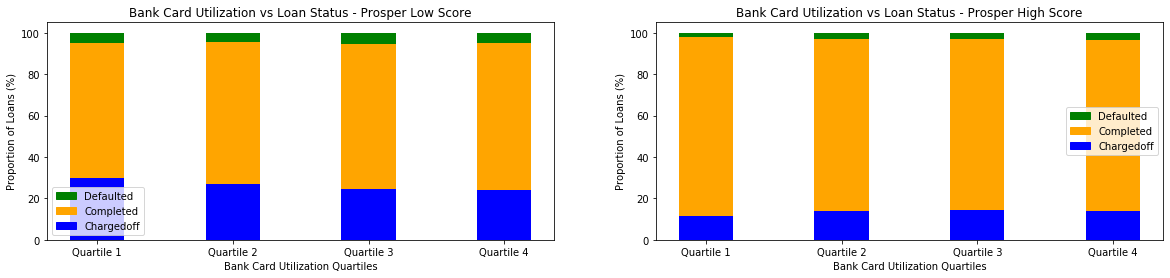

In [49]:
# create two data frames for the higher and lower Prosper score bins
dfBottomHalf = dfClean.query("ProsperScoreBin == 'Bottom Half'").groupby(['BankCardUtilizationBin','LoanStatus'])['LoanNumber'].count().unstack()
dfTopHalf = dfClean.query("ProsperScoreBin == 'Top Half'").groupby(['BankCardUtilizationBin','LoanStatus'])['LoanNumber'].count().unstack()

# get loan counts by loan status across bank card utilization quartiles
dfBottomHalf = dfBottomHalf.T.div(dfBottomHalf.T.sum()).T*100
# divide group counts by totals to scale to 100%
dfTopHalf = dfTopHalf.T.div(dfTopHalf.T.sum()).T*100


# create fig obj
fig, ax = plt.subplots(figsize=[20,4])
# establish column width
width = 0.4

# create dictionary for legend
colors = {'Defaulted':'g','Completed':'orange','Chargedoff':'b'}
# create list from keys of color dict
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]


plt.subplot(1,2,1)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Chargedoff'], width, color='b')
p2_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Completed'], width, bottom=dfBottomHalf['Chargedoff'], color='orange')
p3_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfBottomHalf['Chargedoff'],dfBottomHalf['Completed'])], color='g')
# set plot title
plt.title('Bank Card Utilization vs Loan Status - Prosper Low Score')
plt.xlabel('Bank Card Utilization Quartiles')
plt.ylabel('Proportion of Loans (%)');

# set legend
plt.legend(handles, labels)

plt.subplot(1,2,2)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_top = plt.bar(dfTopHalf.index, dfTopHalf['Chargedoff'], width, color='b')
p2_top = plt.bar(dfTopHalf.index, dfTopHalf['Completed'], width, bottom=dfTopHalf['Chargedoff'], color='orange')
p3_top = plt.bar(dfTopHalf.index, dfTopHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfTopHalf['Chargedoff'],dfTopHalf['Completed'])], color='g')
# title plot
plt.title('Bank Card Utilization vs Loan Status - Prosper High Score');
plt.xlabel('Bank Card Utilization Quartiles')
plt.ylabel('Proportion of Loans (%)');
# set legend
plt.legend(handles, labels);


> <strong>Loan Status versus Bank Card Utilization, and Prosper Score: </strong> The relationship between this variable and loan status is mixed. For the lower Prosper Score group, there is little difference in rates of default between the first and last quartile groups, and instead we see higher rates of chargeoff in the lowest quartile. When looking at the higher Prosper Score group, we do see a small decline in the rates of default between the first and last quartile as well as a small decline in chargeoffs.

### Loan Status versus Debt to Income, and Prosper Score

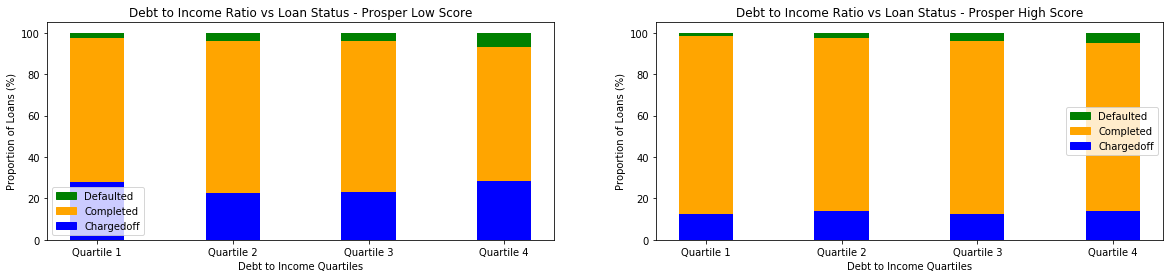

In [50]:
# create two data frames for the higher and lower Prosper score bins
dfBottomHalf = dfClean.query("ProsperScoreBin == 'Bottom Half'").groupby(['DebtToIncomeRatioBin','LoanStatus'])['LoanNumber'].count().unstack()
dfTopHalf = dfClean.query("ProsperScoreBin == 'Top Half'").groupby(['DebtToIncomeRatioBin','LoanStatus'])['LoanNumber'].count().unstack()

# get loan counts by loan status across Debt to income quartiles
dfBottomHalf = dfBottomHalf.T.div(dfBottomHalf.T.sum()).T*100
# divide group counts by totals to scale to 100%
dfTopHalf = dfTopHalf.T.div(dfTopHalf.T.sum()).T*100


# create fig obj
fig, ax = plt.subplots(figsize=[20,4])
# establish column width
width = 0.4

# create dictionary for legend
colors = {'Defaulted':'g','Completed':'orange','Chargedoff':'b'}
# create list from keys of color dict
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]

plt.subplot(1,2,1)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Chargedoff'], width, color='b')
p2_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Completed'], width, bottom=dfBottomHalf['Chargedoff'], color='orange')
p3_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfBottomHalf['Chargedoff'],dfBottomHalf['Completed'])], color='g')
# plot title
plt.title('Debt to Income Ratio vs Loan Status - Prosper Low Score')
# set labels
plt.xlabel('Debt to Income Quartiles')
plt.ylabel('Proportion of Loans (%)');
# set legend
plt.legend(handles, labels);

plt.subplot(1,2,2)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_top = plt.bar(dfTopHalf.index, dfTopHalf['Chargedoff'], width, color='b')
p2_top = plt.bar(dfTopHalf.index, dfTopHalf['Completed'], width, bottom=dfTopHalf['Chargedoff'], color='orange')
p3_top = plt.bar(dfTopHalf.index, dfTopHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfTopHalf['Chargedoff'],dfTopHalf['Completed'])], color='g')
# plot title
plt.title('Debt to Income Ratio vs Loan Status - Prosper High Score');
# set labels
plt.xlabel('Debt to Income Quartiles')
plt.ylabel('Proportion of Loans (%)');
# set legend
plt.legend(handles, labels);


> <strong>Loan Status versus Debt to Income, and Prosper Score: </strong> The relationship between this variable and loan status is promising. For both the low and high Prosper Score groups we see a moderate decline in default rates between the first and fourth quartile of Debt to Income Ratio. Intrestingly, the rate of chargeoff remains fairly stable between the first and fourth quartile.

### Loan Status versus  Open Lines of Credit, and Prosper Score

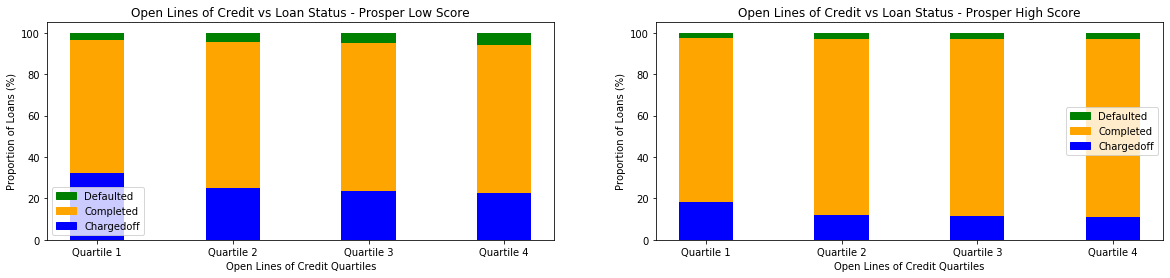

In [51]:
# create two data frames for the higher and lower Prosper score bins
dfBottomHalf = dfClean.query("ProsperScoreBin == 'Bottom Half'").groupby(['CreditLinesBin','LoanStatus'])['LoanNumber'].count().unstack()
dfTopHalf = dfClean.query("ProsperScoreBin == 'Top Half'").groupby(['CreditLinesBin','LoanStatus'])['LoanNumber'].count().unstack()

# get loan counts by loan status across open lines of credit quartiles
dfBottomHalf = dfBottomHalf.T.div(dfBottomHalf.T.sum()).T*100
# divide group counts by totals to scale to 100%
dfTopHalf = dfTopHalf.T.div(dfTopHalf.T.sum()).T*100

# create fig obj
fig, ax = plt.subplots(figsize=[20,4])
# establish column width
width = 0.4

# create dictionary for legend
colors = {'Defaulted':'g','Completed':'orange','Chargedoff':'b'}
# create list from keys of color dict
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]

plt.subplot(1,2,1)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Chargedoff'], width, color='b')
p2_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Completed'], width, bottom=dfBottomHalf['Chargedoff'], color='orange')
p3_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfBottomHalf['Chargedoff'],dfBottomHalf['Completed'])], color='g')
# set plot title
plt.title('Open Lines of Credit vs Loan Status - Prosper Low Score')
# set labels
plt.xlabel('Open Lines of Credit Quartiles')
plt.ylabel('Proportion of Loans (%)');
# set legend
plt.legend(handles, labels);

plt.subplot(1,2,2)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_top = plt.bar(dfTopHalf.index, dfTopHalf['Chargedoff'], width, color='b')
p2_top = plt.bar(dfTopHalf.index, dfTopHalf['Completed'], width, bottom=dfTopHalf['Chargedoff'], color='orange')
p3_top = plt.bar(dfTopHalf.index, dfTopHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfTopHalf['Chargedoff'],dfTopHalf['Completed'])], color='g')
# set plot title
plt.title('Open Lines of Credit vs Loan Status - Prosper High Score');
# set labels
plt.xlabel('Open Lines of Credit Quartiles')
plt.ylabel('Proportion of Loans (%)');
# set legend
plt.legend(handles, labels);

#g = sb.FacetGrid(data = dfClean, col = 'ProsperScoreBin', size = 6, margin_titles = True)
#g.map(sb.barplot, 'CreditLinesBin','DebtToIncomeRatio',ci='sd');

> <strong>Loan Status versus Open Lines of Credit, and Prosper Score: </strong> The relationship between this variable and loan status is fairly unreliable. For both the low and high Prosper Score groups we see a very small decline in default rates between the first and fourth quartile of Open Lines of Credit. However, for both the low and high Prosper Score groups the rate of chargeoff is higher in the first quartile compared to the fourth quartile--this result is counter intutitive.

### Final Review for Bank Card Utilization, Debt to Income Ratio, and Number Credit Lines

> The above listed variables showed some relation (though at times inconsistent) with final loan outcome. Until now, the analysis focused on two large buckets of Prosper Scores (bottom and top half), and it is possible that the effects of bank card utilization, debt to income, or number of credit lines is interacting with Prosper Score. To control for this, the next visuals will focus on a single bottom and high Prosper score to help isolate the effects of the three variables of interest.

Create new focused dataframe

In [42]:
# Create new dataframe, selecting 5 and 9 since they have roughly the same number of closed loans.
dfFocused = dfClean.query('ProsperScore == 5 or ProsperScore == 9')

### Bank Card Utilization 

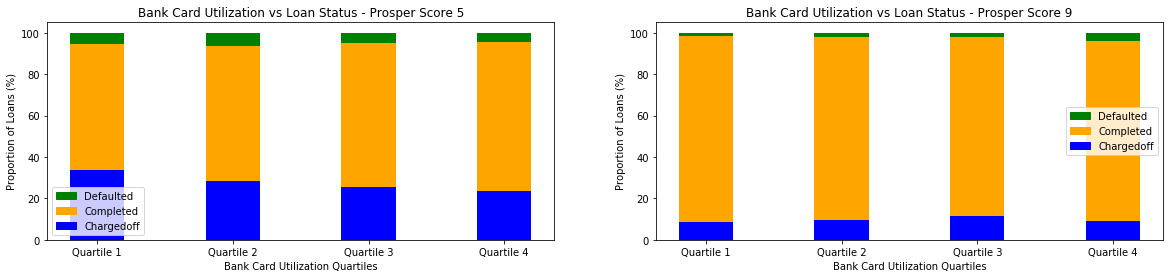

In [52]:
# Create new dataframe focusing on Prosper score of 5 or 9 only
dfBottomHalf = dfFocused.query("ProsperScore == 5").groupby(['BankCardUtilizationBin','LoanStatus'])['LoanNumber'].count().unstack()
dfTopHalf = dfFocused.query("ProsperScore == 9").groupby(['BankCardUtilizationBin','LoanStatus'])['LoanNumber'].count().unstack()

# get loan counts by loan status across bank card utilization quartiles
dfBottomHalf = dfBottomHalf.T.div(dfBottomHalf.T.sum()).T*100
# divide by total to get to 100%
dfTopHalf = dfTopHalf.T.div(dfTopHalf.T.sum()).T*100


# create fig obj
fig, ax = plt.subplots(figsize=[20,4])
# establish column width
width = 0.4

# create dictionary for legend
colors = {'Defaulted':'g','Completed':'orange','Chargedoff':'b'}
# create list from keys of color dict
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]

plt.subplot(1,2,1)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Chargedoff'], width, color='b')
p2_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Completed'], width, bottom=dfBottomHalf['Chargedoff'], color='orange')
p3_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfBottomHalf['Chargedoff'],dfBottomHalf['Completed'])], color='g')
# set plot title
plt.title('Bank Card Utilization vs Loan Status - Prosper Score 5')
# set labels
plt.xlabel('Bank Card Utilization Quartiles')
plt.ylabel('Proportion of Loans (%)');
# set legend
plt.legend(handles, labels);

plt.subplot(1,2,2)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_top = plt.bar(dfTopHalf.index, dfTopHalf['Chargedoff'], width, color='b')
p2_top = plt.bar(dfTopHalf.index, dfTopHalf['Completed'], width, bottom=dfTopHalf['Chargedoff'], color='orange')
p3_top = plt.bar(dfTopHalf.index, dfTopHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfTopHalf['Chargedoff'],dfTopHalf['Completed'])], color='g')
# set plot title
plt.title('Bank Card Utilization vs Loan Status - Prosper Score 9');
# set labels
plt.xlabel('Bank Card Utilization Quartiles')
plt.ylabel('Proportion of Loans (%)');
# set legend
plt.legend(handles, labels);


> <strong>Loan Status versus Bank Card Utilization, and Prosper Scores of 5 and 9: </strong> The relationship between this variable and loan status remains mixed. For the lower Prosper Score group, there is little difference in rates of default between the first and last quartile groups, and instead we see higher rates of chargeoff in the lowest quartile. When looking at the higher Prosper Score group, we once again see small decline in the rates of default between the first and last quartile; while rate of chargeoff remains flat.

### Debt to Income

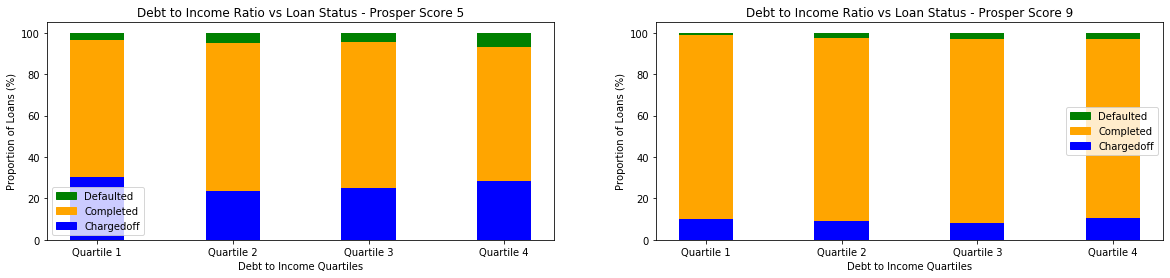

In [53]:
# Create new dataframe focusing on Prosper score of 5 or 9 only
dfBottomHalf = dfFocused.query("ProsperScore == 5").groupby(['DebtToIncomeRatioBin','LoanStatus'])['LoanNumber'].count().unstack()
dfTopHalf = dfFocused.query("ProsperScore == 9").groupby(['DebtToIncomeRatioBin','LoanStatus'])['LoanNumber'].count().unstack()

# get loan counts by loan status across debt to income quartiles
dfBottomHalf = dfBottomHalf.T.div(dfBottomHalf.T.sum()).T*100
# divide by overall totals to get scale to 100%
dfTopHalf = dfTopHalf.T.div(dfTopHalf.T.sum()).T*100


# create fig obj
fig, ax = plt.subplots(figsize=[20,4])
# establish column width
width = 0.4

# create dictionary for legend
colors = {'Defaulted':'g','Completed':'orange','Chargedoff':'b'}
# create list from keys of color dict
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]

plt.subplot(1,2,1)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Chargedoff'], width, color='b')
p2_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Completed'], width, bottom=dfBottomHalf['Chargedoff'], color='orange')
p3_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfBottomHalf['Chargedoff'],dfBottomHalf['Completed'])], color='g')
# set plot title
plt.title('Debt to Income Ratio vs Loan Status - Prosper Score 5')
# set labels
plt.xlabel('Debt to Income Quartiles')
plt.ylabel('Proportion of Loans (%)');
# set legend
plt.legend(handles, labels);

plt.subplot(1,2,2)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_top = plt.bar(dfTopHalf.index, dfTopHalf['Chargedoff'], width, color='b')
p2_top = plt.bar(dfTopHalf.index, dfTopHalf['Completed'], width, bottom=dfTopHalf['Chargedoff'], color='orange')
p3_top = plt.bar(dfTopHalf.index, dfTopHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfTopHalf['Chargedoff'],dfTopHalf['Completed'])], color='g')
# set plot title
plt.title('Debt to Income Ratio vs Loan Status - Prosper Score 9');
# set labels
plt.xlabel('Debt to Income Quartiles')
plt.ylabel('Proportion of Loans (%)');
# set legend
plt.legend(handles, labels);

> <strong>Loan Status versus Debt to Income, and Prosper Scores 5 and 9: </strong> The relationship between this variable and loan status remains promising. For both the low and high Prosper Score groups we see a moderate decline in default rates between the first and fourth quartile of Debt to Income Ratio. Again, the rate of chargeoff remains fairly stable between the first and fourth quartile for both the Prosper Score of 5 and 9.

### Number of Credit Lines

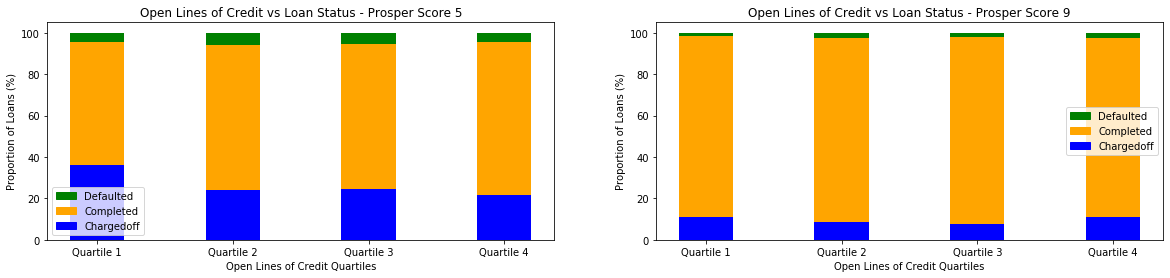

In [54]:
# Create new dataframe focusing on Prosper score of 5 or 9 only
dfBottomHalf = dfFocused.query("ProsperScore == 5").groupby(['CreditLinesBin','LoanStatus'])['LoanNumber'].count().unstack()
dfTopHalf = dfFocused.query("ProsperScore == 9").groupby(['CreditLinesBin','LoanStatus'])['LoanNumber'].count().unstack()

# get loan counts by loan status across open lines of credit quartiles
dfBottomHalf = dfBottomHalf.T.div(dfBottomHalf.T.sum()).T*100
# divide by overall totals to get scale to 100%
dfTopHalf = dfTopHalf.T.div(dfTopHalf.T.sum()).T*100

# create fig obj
fig, ax = plt.subplots(figsize=[20,4])
# establish column width
width = 0.4

# create dictionary for legend
colors = {'Defaulted':'g','Completed':'orange','Chargedoff':'b'}
# create list from keys of color dict
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]

plt.subplot(1,2,1)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Chargedoff'], width, color='b')
p2_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Completed'], width, bottom=dfBottomHalf['Chargedoff'], color='orange')
p3_bottom = plt.bar(dfBottomHalf.index, dfBottomHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfBottomHalf['Chargedoff'],dfBottomHalf['Completed'])], color='g')
# set plot title
plt.title('Open Lines of Credit vs Loan Status - Prosper Score 5')
# set labels
plt.xlabel('Open Lines of Credit Quartiles')
plt.ylabel('Proportion of Loans (%)');
# set legend
plt.legend(handles, labels);

plt.subplot(1,2,2)
# Invididually create each bar for each loan status, they are then plotted ontop of each other for each quartile
p1_top = plt.bar(dfTopHalf.index, dfTopHalf['Chargedoff'], width, color='b')
p2_top = plt.bar(dfTopHalf.index, dfTopHalf['Completed'], width, bottom=dfTopHalf['Chargedoff'], color='orange')
p3_top = plt.bar(dfTopHalf.index, dfTopHalf['Defaulted'], width,
             bottom=[sum(x) for x in zip(dfTopHalf['Chargedoff'],dfTopHalf['Completed'])], color='g')
# set plot title
plt.title('Open Lines of Credit vs Loan Status - Prosper Score 9');
# set labels
plt.xlabel('Open Lines of Credit Quartiles')
plt.ylabel('Proportion of Loans (%)');
# set legend
plt.legend(handles, labels);


> <strong>Loan Status versus Open Lines of Credit, and Prosper Scores 5 and 9: </strong> The relationship between this variable and loan status remains fairly unreliable. For the high Prosper Score groups we see a very small decline in default rates between the first and fourth quartile of Open Lines of Credit, while the lower Prosper Score group shows no such behavior. Again, for both the low and high Prosper Score groups the rate of chargeoff is higher in the first quartile compared to the fourth quartile.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Generally speaking, the core variables of interest (Bank Card Utilization, Debt to Income, and Open Credit), showed a modest relationship with overall loan status. Controlling for Prosper Score, higher levels of debt to income was associated with a higher number of loans closing with a status of 'Defaulted' or 'Chargedoff' for both the Top and Bottom Prosper Score bins. Bank card utilization showed mixed results, with high and lower levels of card utilization showing no meaningful change in loan status distribution within the bottom half of Prosper loan scores; however, within the top half of Prosper scores, lower rates of card utilization showed lower levels of loans closing as 'Defaulted' or 'Chargedoff'. Lastly, reviewing relative number of credit lines also showed mixed results. For the lower half of Proser loan scores, lower relative levels of open credit lines showed lower levels of loans closing as 'Defaulted' or 'Chargedoff', but no such differences in loan status distribution were observed in the top half of Prosper loan scores.

> A final level of analysis focusing only loans with a single low Prosper Score of 5 or High Prosper Score 9, the analysis showed more consistent results for 2 variables (bank card utilization and debt to income), while the number of credit lines looks to have little to no relationship with final loan status.

### Were there any interesting or surprising interactions between features?

> While reviewing the relationship between debt to income ratio and number of credit lines, controlled for Prosper Score, the level of variance was interesting. Specifically, the overall standard deviation of debt to income ratio was significantly higher for loans within the bottom half of the Prosper loan rating scale compared to loans on the top half--the same was true for bank card utilization rates.

> Additionally, I was supprised to see that the relationship between bank card utilization and final loan status was mixed. Specifically, when looking at the bottom half of the Prosper score range, there was little difference in loan outcome between the lowest and highest quartiles of bank card utilization bins. 